<a href="https://colab.research.google.com/github/immisius/Advanced-Machine-Learning/blob/main/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

In [35]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

In [36]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

In [37]:
eig_v,v=np.linalg.eig(2*A)
L=max(eig_v)

In [38]:
def PSI(w):
  return (w-mu).T@A@(w-mu)
def OMEGA(w,lam):
  return lam*np.linalg.norm(w,ord=1)
def O(w,lam):
  w=w.reshape(2,-1)
  return (PSI(w)+OMEGA(w,lam)).squeeze().item()
def nabla_PSI(w):
  return 2*A@(w-mu)

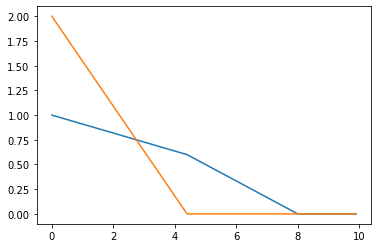

In [39]:
w_hat_lam = []
O_hat=[]
lams = np.arange(0, 10, 0.1)
w_hat=np.ones([2,1])
for lam in lams:
  ### implement PG ###
  while True:
    next_w=np.zeros([2,1])
    for i in range(2):
      v=w_hat[i]-sum([2*A[i][j]*(w_hat[j]-mu[j]) for j in range(2)])/L
      if v>lam/L:
        next_w[i]=v-lam/L
      if abs(v)<=lam/L:
        next_w[i]=0
      if v<-lam/L:
        next_w[i]=v+lam/L
    if abs(O(w_hat,lam)-O(next_w,lam))==0:
      break
    w_hat=next_w
  w_hat_lam.append(w_hat.squeeze())
  O_hat.append(O(w_hat,lam))
  ###
plt.plot(lams, w_hat_lam)

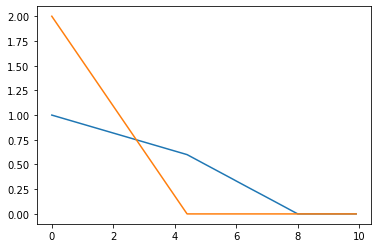

In [40]:
# cvx
w_hat_lam_cvx=[]
O_hat_cvx=[]
for lam in lams:
  w_lasso = cv.Variable((2,1))
  obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
  objective = cv.Minimize(obj_fn)
  constraints = []
  prob = cv.Problem(objective, constraints)
  result = prob.solve(solver=cv.CVXOPT) 
  w_lasso = w_lasso.value
  w_hat_lam_cvx.append(w_lasso.squeeze())
  O_hat_cvx.append(O(w_lasso,lam))
plt.plot(lams, w_hat_lam_cvx)